In [28]:
# importing impotant libraries
from keras.preprocessing.image import ImageDataGenerator

In [29]:
# creating the dataset for training
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='data',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=19,
                                                 directory='data',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 648 images belonging to 4 classes.
Found 160 images belonging to 4 classes.


In [30]:
# checking the shape of the data
train_dataset[0][0].shape

(10, 150, 150, 3)

In [31]:
# importing model 
from keras.applications.inception_v3 import InceptionV3

In [32]:
# load model
model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights='imagenet')

In [33]:
# summarize the model
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation_560 (Activation)     (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

batch_normalization_75 (BatchNo (None, 3, 3, 192)    576         conv2d_75[0][0]                  
__________________________________________________________________________________________________
activation_631 (Activation)     (None, 3, 3, 320)    0           batch_normalization_71[0][0]     
__________________________________________________________________________________________________
activation_635 (Activation)     (None, 3, 3, 192)    0           batch_normalization_75[0][0]     
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 3, 3, 768)    0           mixed7[0][0]                     
__________________________________________________________________________________________________
mixed8 (Concatenate)            (None, 3, 3, 1280)   0           activation_631[0][0]             
                                                                 activation_635[0][0]             
          

In [34]:
# setting tranable layers as false to further custimization
for layer in model.layers:
    layer.tranabel = False

In [35]:
# importing important libraries
import keras
from keras.optimizers import RMSprop
from keras import layers
from keras import Model

In [39]:
x = layers.Flatten()(model.output)
x = layers.Dense  (1, activation='sigmoid')(x)           

new_model = Model(model.input, x)

In [40]:
new_model.compile(optimizer = RMSprop(lr=0.001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [41]:
history = new_model.fit_generator(train_dataset,
                               epochs=10, 
                               validation_data=validation_dataset,
                               verbose=2, steps_per_epoch = 50,
                               validation_steps=10)

Epoch 1/10
50/50 - 162s - loss: 1.0089 - acc: 0.7129 - val_loss: 2512.3755 - val_acc: 0.2500
Epoch 2/10
50/50 - 150s - loss: 0.6273 - acc: 0.7380
Epoch 3/10
50/50 - 149s - loss: 0.6407 - acc: 0.7269
Epoch 4/10
50/50 - 151s - loss: 0.6003 - acc: 0.7410
Epoch 5/10
50/50 - 152s - loss: 0.6581 - acc: 0.7369
Epoch 6/10
50/50 - 153s - loss: 0.6758 - acc: 0.7260
Epoch 7/10
50/50 - 149s - loss: 0.6810 - acc: 0.7349
Epoch 8/10
50/50 - 146s - loss: 0.6233 - acc: 0.7339
Epoch 9/10
50/50 - 137s - loss: 0.6465 - acc: 0.7380
Epoch 10/10
50/50 - 138s - loss: 0.5978 - acc: 0.7410


In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

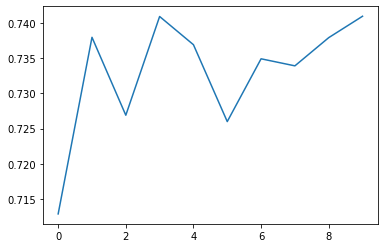

In [43]:
plt.plot(history.history['acc'])
plt.show()